<a href="https://colab.research.google.com/github/mariia-8/Inventory-Forecasting/blob/main/online_retail_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [ ]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')


df = pd.concat([sheet1, sheet2], axis=0)


df.reset_index(drop=True, inplace=True)

In [ ]:
# to download the data uncomment the code below
#from google.colab import files
#df.to_csv('originaldf_2years.csv')
#files.download('originaldf_2years.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [ ]:
#Number of rows
len(df)

1067371

In [ ]:
# Number of Invoices
len(df['Invoice'].unique())

53628

In [ ]:
df.describe(include='all')

<ipython-input-8-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371.0,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628.0,5305,5698,NaN,47635,NaN,NaN,43
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350.0,5829,5918,NaN,1350,NaN,NaN,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN


In [ ]:
df['Invoice'] = df['Invoice'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#Number of records with bad adjustments
len(df[df['Invoice'].str.contains('A')])

6

In [ ]:
df[df['Invoice'].str.contains('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
#Number of cancelled transactions
len(df[df['Invoice'].str.contains('C')])

19494

In [ ]:
df.describe(include='all')

<ipython-input-13-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN


Analysis of missing values

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
# Look at the missing values
missing_values_rows = df[df.isnull().any(axis=1)]
missing_description = missing_values_rows[missing_values_rows[['Description']].isnull().any(axis=1)]

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

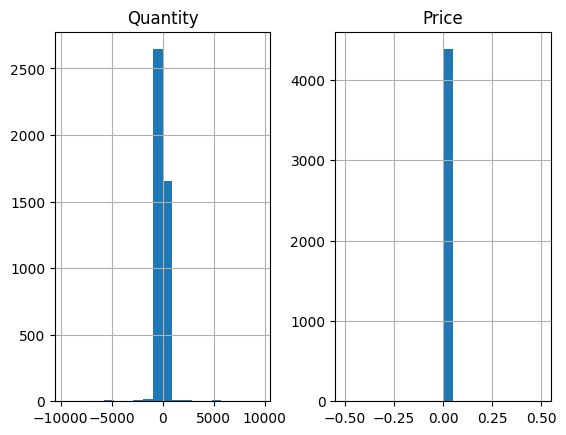

In [ ]:
missing_description.hist(column=['Quantity', 'Price'], bins=20)

In [ ]:
missing_description.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.0,NaN,United Kingdom


<Axes: >

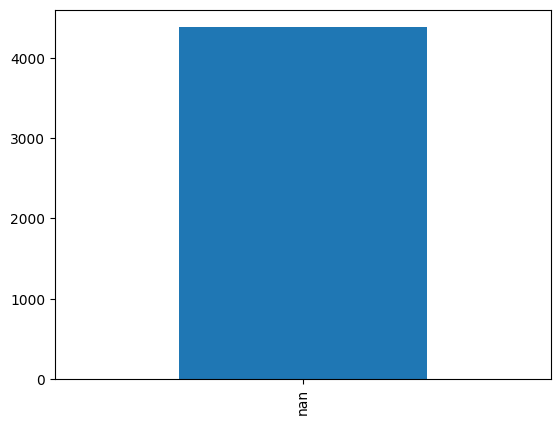

In [ ]:
missing_description['Customer ID'].value_counts(dropna=False).plot(kind='bar')

In [ ]:
missing_description[(missing_description['StockCode'].str.len()) > 5]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4566,489821,85049G,NaN,-240,2009-12-02 13:25:00,0.0,NaN,United Kingdom
6378,489882,35751C,NaN,12,2009-12-02 16:22:00,0.0,NaN,United Kingdom
6555,489898,79323G,NaN,954,2009-12-03 09:40:00,0.0,NaN,United Kingdom
9249,490123,84508B,NaN,184,2009-12-03 18:08:00,0.0,NaN,United Kingdom
16185,490735,35976B,NaN,-60,2009-12-07 17:12:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1022762,578360,84971L,NaN,2,2011-11-24 10:36:00,0.0,NaN,United Kingdom
1039816,579691,47503A,NaN,-5,2011-11-30 14:05:00,0.0,NaN,United Kingdom
1043180,580087,84341B,NaN,-2,2011-12-01 14:27:00,0.0,NaN,United Kingdom
1047621,580379,72225C,NaN,-144,2011-12-02 17:57:00,0.0,NaN,United Kingdom


In [ ]:
#How many of missing description have negative quantity
len(missing_description[missing_description['Quantity'] < 1])

2689

In [ ]:
#How many have price 0
len(missing_description[missing_description['Price'] == 0]) #all of them have price of 0

4382

In [ ]:
len(df)

1067371

In [ ]:
#Remove missing description from the dataset
df = df.dropna(subset=['Description'])

In [ ]:
len(df)

1062989

In [ ]:
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
Country             0
dtype: int64

In [ ]:
#Remove missing description from the dataset
df = df.dropna(subset=['Customer ID'])

In [ ]:
len(df)

824364

In [ ]:
# check for the time range
min_date  = df['InvoiceDate'].min()
max_date = df['InvoiceDate'].max()
print("First date:", min_date)
print("Last date:", max_date)

First date: 2009-12-01 07:45:00
Last date: 2011-12-09 12:50:00


In [ ]:
# check number of rows
num_of_rows = len(df)
print(f"The number of rows is {num_of_rows}")

The number of rows is 824364


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df.rename(columns={"Customer ID": "CustomerID"})

In [ ]:
df = df.sort_values(by='InvoiceDate')

In [ ]:
#identify duplicates across columns
df1 = df.groupby(["Invoice", "StockCode", "Description", "Quantity", "InvoiceDate",	"Price",	"CustomerID",	"Country"]).size().reset_index(name='Count')

In [ ]:
df1.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Count
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1
1,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,1
2,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1
4,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,1


In [ ]:
#glimpse at the duplicated rows
df1[df1['Count'] > 1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Count
338,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom,2
345,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
347,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,3
348,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,2
351,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,2
...,...,...,...,...,...,...,...,...,...
796257,C572226,85066,CREAM SWEETHEART MINI CHEST,-1,2011-10-21 13:58:00,12.75,15321.0,United Kingdom,2
796558,C574095,22326,ROUND SNACK BOXES SET OF4 WOODLAND,-1,2011-11-03 09:54:00,2.95,12674.0,France,2
796646,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom,2
796927,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom,2


In [ ]:
#number of duplicated rows
len(df1[df1['Count'] > 1])

25061

In [ ]:
#duplicated rows closer look
df[(df['Invoice'] == '489517') & (df['StockCode'] == 21491)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,2009-12-01 11:34:00,1.95,16329.0,United Kingdom


In [ ]:
len(df)

824364

In [ ]:
#remove duplicate rows based on all columns
#df1 = df1[df1['Count'] == 1]
df = df.drop_duplicates()

In [ ]:
len(df)

797885

In [ ]:
#check duplicates by rows
df1 = df.groupby(["Invoice", "StockCode", "Description", "Quantity", "InvoiceDate",	"Price",	"CustomerID",	"Country"]).size().reset_index(name='Count')
df1[df1['Count'] > 1]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Count


In [ ]:
# Duplicates in StockCode and product Description
df.drop_duplicates(["StockCode", "Description"]).groupby("StockCode")["Description"].count().max()

4

In [ ]:
#Make each StockCode be unique to each Description
unique_stockcode = df.groupby(['StockCode','Description'], as_index=False).count()
unique_stockcode[unique_stockcode['StockCode'].duplicated()]

,StockCode,Description,Invoice,Quantity,InvoiceDate,Price,CustomerID,Country
17,16011,ANIMAL STICKERS,101,101,101,101,101,101
19,16012,FOOD/DRINK SPUNGE STICKERS,20,20,20,20,20,20
64,20615,BLUE SPOTTY PASSPORT COVER,39,39,39,39,39,39
72,20622,VIPPASSPORT COVER,71,71,71,71,71,71
74,20652,BLUE SPOTTY LUGGAGE TAG,45,45,45,45,45,45
...,...,...,...,...,...,...,...,...
5054,90014B,GOLD M.O.P. ORBIT NECKLACE,2,2,2,2,2,2
5056,90014C,SILVER/BLACK ORBIT NECKLACE,13,13,13,13,13,13
5316,ADJUST,Adjustment by john on 26/01/2010 16,36,36,36,36,36,36
5317,ADJUST,Adjustment by john on 26/01/2010 17,22,22,22,22,22,22


In [ ]:
# Remove duplicate rows
unique_stockcode.drop_duplicates('StockCode', keep='first', inplace=True)
unique_stockcode = unique_stockcode[['StockCode','Description']]

In [ ]:
df = pd.merge(df,unique_stockcode,on='StockCode', how='left',validate='many_to_one')

In [ ]:
df.head()

,Invoice,StockCode,Description_x,Quantity,InvoiceDate,Price,CustomerID,Country,Description_y
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,PINK CHERRY LIGHTS
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,WHITE CHERRY LIGHTS
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE"
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX


In [ ]:
df.drop('Description_x', axis=1, inplace=True)
df.rename(columns={'Description_y': 'Description'}, inplace=True)

In [ ]:
online_store = df.copy()

In [ ]:
online_store = online_store[["Invoice", "StockCode", "Description", "Quantity", "InvoiceDate",	"Price", "CustomerID", "Country"]]

In [ ]:
online_store = online_store.sort_values(by='InvoiceDate')

In [ ]:
# check number of rows
num_of_rows = len(online_store)
print(f"The number of rows is {num_of_rows}")

The number of rows is 797885


In [ ]:
#Missing values
online_store.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [ ]:
print(online_store.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64


In [ ]:
online_store['Invoice'] = online_store['Invoice'].astype(str)
online_store['StockCode'] = online_store['StockCode'].astype(str)
online_store['Description'] = online_store['Description'].astype(str)
online_store['CustomerID'] = online_store['CustomerID'].astype(str)
online_store['Country'] = online_store['Country'].astype(str)
#online_store['InvoiceDate'] = (df['InvoiceDate']).dt.date

In [ ]:
#keep quantity bigger than 0 and price bigger than 0 to remove cancelled orders
online_store = online_store.query('Quantity > 0 and Price > 0')

In [ ]:
# remove cancelled orders and bad debt adjustments
online_store = online_store[~online_store['Invoice'].str.contains('C', na = False)]
online_store = online_store[~online_store['Invoice'].str.contains('A', na = False)]

In [ ]:
#remove transactions other than sales
online_store = online_store[~online_store['Description'].str.contains("Adjust|AMAZON|Manual|Bank Charges|DOTCOM POSTAGE|CRUK Commission|POSTAGE", na=False)]

In [ ]:
# Ensure 6 digits for invoice
online_store = online_store[(online_store.Invoice.str.len()) == 6]

In [ ]:
# No Stock code with less than 5 digits. More than 5 digits is acceptable because it can indicate the product type
online_store = online_store[(online_store.StockCode.str.len()) >= 5]

In [ ]:
len(online_store)

776589

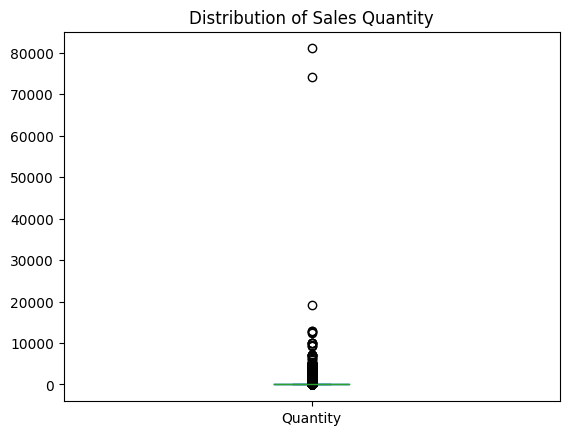

In [ ]:
# Distibution of quantity
online_store[['Quantity']].plot(kind='box', title='Distribution of Sales Quantity') #showfliers= False)
plt.show()

In [ ]:
online_store[online_store['Price'] > 600]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
553684,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom
553687,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom


In [ ]:
#where is majority of the data?
price = (online_store[online_store['Price'] <= 30].shape[0] / online_store['Price'].shape[0]) * 100
quantity = (online_store[online_store['Quantity'] <= 500].shape[0] / online_store['Quantity'].shape[0]) * 100

In [ ]:
print(price,quantity)

99.89093329933851 99.8805030717664


In [ ]:
online_store[online_store['Quantity'] > 144].shape[0]

5868

In [ ]:
len(online_store[online_store['Price'] > 12.75])

6807

In [ ]:
#Same calculation using quantiles
q_99 = online_store.loc[:, ['Price', 'Quantity']].quantile(0.99)
print(q_99)

Price        12.75
Quantity    144.00
Name: 0.99, dtype: float64


In [ ]:
online_store.describe()

,Quantity,Price
count,776589.000000,776589.000000
mean,13.519106,2.934577
std,146.095571,4.293581
min,1.000000,0.030000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,649.500000


In [ ]:
len(online_store)

776589

In [ ]:
# Z-scores
z_scores_quantity = (online_store['Quantity'] - online_store['Quantity'].mean()) / online_store['Quantity'].std()

In [ ]:
len(z_scores_quantity)

776589

In [ ]:
# Absolute Z-scores greater than 3 for 'Quantity'
outliers = (np.abs(z_scores_quantity) > 3)

In [ ]:
# Remove outliers from the DataFrame
cleaned_store = online_store[~outliers]

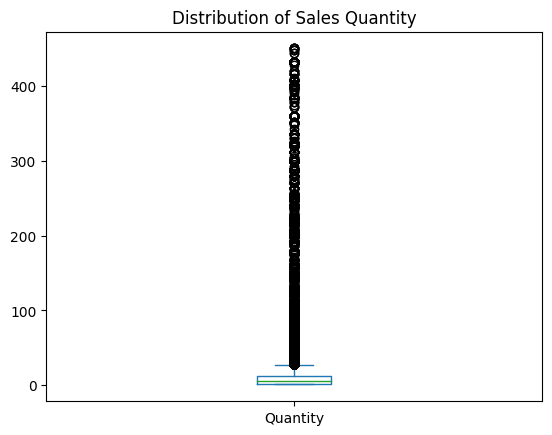

In [ ]:
cleaned_store[['Quantity']].plot(kind='box', title='Distribution of Sales Quantity')
plt.show()

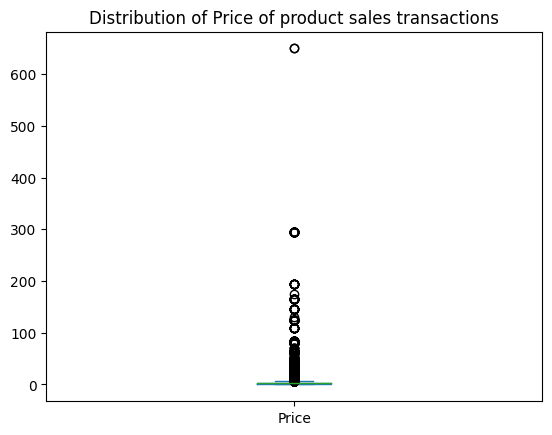

In [ ]:
cleaned_store[['Price']].plot(kind='box', title='Distribution of Price of product sales transactions')
plt.show()

In [ ]:
len(cleaned_store)

775414

In [ ]:
#Pareto Principle
df_sorted = cleaned_store.groupby(['StockCode'])['Quantity'].sum().reset_index()
df_sorted = df_sorted.sort_values(by="Quantity", ascending=False)
df_sorted['Cumulative Quantity'] = df_sorted['Quantity'].cumsum()

In [ ]:
total_quantity = df_sorted['Quantity'].sum()

In [ ]:
df_sorted['Cumulative Percentage'] = (df_sorted['Cumulative Quantity'] / total_quantity) * 100

In [ ]:
df_sorted.head()

,StockCode,Quantity,Cumulative Quantity,Cumulative Percentage
4055,85099B,88936,88936,0.985662
4077,85123A,77916,166852,1.849191
600,21212,73290,240142,2.661451
3816,84879,64906,305048,3.380793
3408,84077,60497,365545,4.051270


In [ ]:
len(df_sorted['StockCode'].unique())

4619

In [ ]:
len(df_sorted[df_sorted["Cumulative Percentage"] <= 80])

1068

In [ ]:
top_products = df_sorted[df_sorted["Cumulative Percentage"] <= 80]

In [ ]:
len(top_products)

1068

In [ ]:
top_products.head()

,StockCode,Quantity,Cumulative Quantity,Cumulative Percentage
4055,85099B,88936,88936,0.985662
4077,85123A,77916,166852,1.849191
600,21212,73290,240142,2.661451
3816,84879,64906,305048,3.380793
3408,84077,60497,365545,4.051270


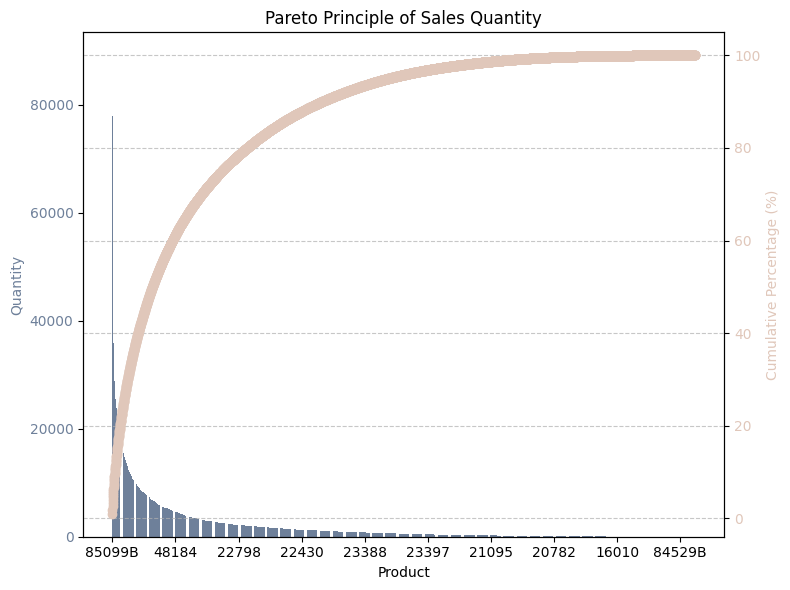

In [ ]:
greyish = '#6e809a'
light_brown = '#e0c7ba'

fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar plot for quantity (greyish)
ax1.bar(df_sorted['StockCode'], df_sorted['Quantity'], color=greyish)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity', color=greyish)
ax1.tick_params(axis='y', labelcolor=greyish)

# Create a secondary y-axis for cumulative percentage (light brown)
ax2 = ax1.twinx()
ax2.plot(df_sorted['StockCode'], df_sorted['Cumulative Percentage'], color=light_brown, marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color=light_brown)
ax2.tick_params(axis='y', labelcolor=light_brown)

plt.title('Pareto Principle of Sales Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
step = 500
plt.xticks(range(0, len(df_sorted['StockCode']), step), df_sorted['StockCode'][::step], rotation=45)
plt.show()

In [ ]:
cleaned_store = cleaned_store[cleaned_store['StockCode'].isin(top_products['StockCode'])]

In [ ]:
len(cleaned_store)

532491

In [ ]:
cleaned_store.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
len(cleaned_store['Invoice'].unique())

35048

In [ ]:
len(cleaned_store['CustomerID'].unique())

5755

In [ ]:
len(cleaned_store['StockCode'].unique())

1068

In [ ]:
len(cleaned_store['Country'].unique())

41

In [ ]:
cleaned_store.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
cleaned_store.describe()

,Quantity,Price
count,532491.000000,532491.000000
mean,13.553745,2.390517
std,27.769045,2.502760
min,1.000000,0.040000
25%,2.000000,0.950000
50%,6.000000,1.650000
75%,12.000000,2.950000
max,450.000000,649.500000


In [ ]:
cleaned_store['CustomerID'] = cleaned_store['CustomerID'].str[:-2]

In [ ]:
cleaned_store.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


In [ ]:
q_99 = cleaned_store.loc[:, ['Price', 'Quantity']].quantile(0.99)
print(q_99)

Price        10.95
Quantity    144.00
Name: 0.99, dtype: float64


In [ ]:
# to download the data uncomment the code below
#from google.colab import files
#cleaned_store.to_csv('cleaned_store.csv')
#files.download('cleaned_store.csv')